# Problem Statement –
Design RNN or its variant including LSTM or GRU a) Select a suitable time series
dataset. Example – predict sentiments based on product reviews b) Apply for prediction

In [2]:
# Name : Rhutuja Vishwanath Patil
# Batch : B
# Roll No.: 2447029 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [4]:
vocab_size = 10000  # only top 10,000 words
max_len = 200       # maximum review length

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to same length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 29s 2us/step


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output: positive or negative
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


C:\Users\rhutu\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(x_train, y_train,
                    epochs=3,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 143ms/step - accuracy: 0.6664 - loss: 0.5803 - val_accuracy: 0.8584 - val_loss: 0.3328
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 166ms/step - accuracy: 0.9059 - loss: 0.2521 - val_accuracy: 0.8636 - val_loss: 0.3214
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 162ms/step - accuracy: 0.9234 - loss: 0.2027 - val_accuracy: 0.8658 - val_loss: 0.3647


In [7]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Predict on sample reviews
sample_idx = 0
sample_review = x_test[sample_idx].reshape(1, -1)
pred = model.predict(sample_review)[0][0]
print(f"Predicted Sentiment: {'Positive' if pred > 0.5 else 'Negative'} | Actual: {'Positive' if y_test[sample_idx] else 'Negative'}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.8616 - loss: 0.3837

Test Accuracy: 0.8616
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Predicted Sentiment: Negative | Actual: Negative


In [10]:
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step


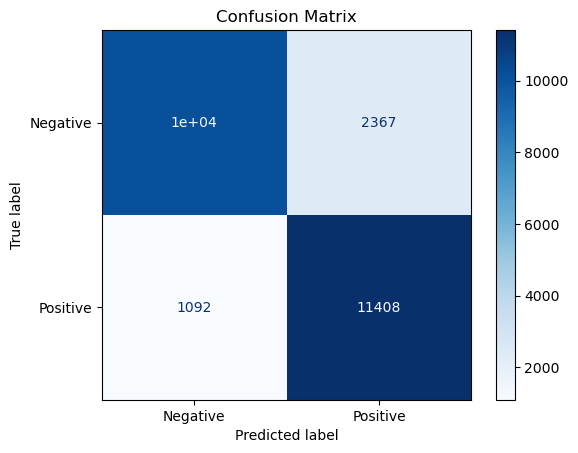

In [13]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

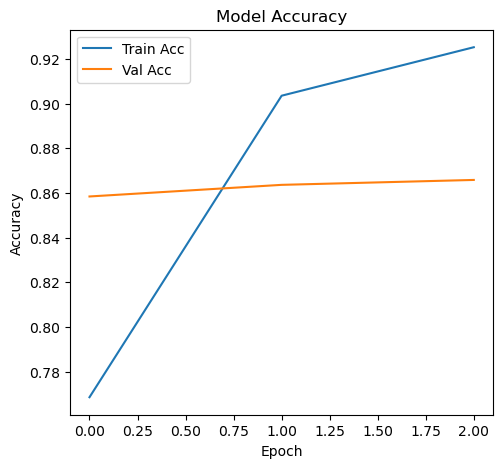

In [15]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


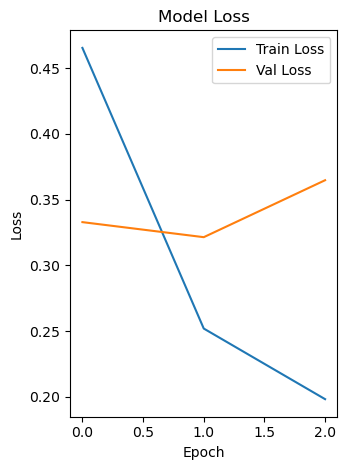

In [16]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()